# Yusra Fayyaz - 106319100

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/Users/yusrafayyaz/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# 1.) Pull in Data and Convert ot Monthly

In [2]:
apple_data = yf.download('AAPL')
df = apple_data.resample("M").last()[["Adj Close"]]

[*********************100%%**********************]  1 of 1 completed


# 2.) Create columns. 
  - Current Stock Price, Difference in stock price, Whether it went up or down over the next month,  option premium

In [3]:
df.head()

,Adj Close
Date,
1980-12-31,0.117887
1981-01-31,0.097592
1981-02-28,0.091546
1981-03-31,0.084637
1981-04-30,0.098023


In [4]:
df["Diff"] = df["Adj Close"].diff().shift(-1)
df["Target"] = np.sign(df["Diff"])
df["Premium"] = 0.08 * df["Adj Close"]

# 3.) Pull in X data, normalize and build a LogReg on column 2

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [6]:
X = pd.read_csv("Xdata.csv", index_col="Date", parse_dates=["Date"])

In [7]:
y = df.loc[:"2023-09-30","Target"].copy()
df = df.loc[:"2023-09-30",:].copy()

In [8]:
logreg = LogisticRegression()
logreg.fit(X,y)

LogisticRegression()

# 4.) Add columns, prediction and profits.

In [9]:
y_pred = logreg.predict(X)

In [10]:
df["predictions"] = y_pred

In [11]:
df["Profits"] = 0

In [12]:
# TP
df.loc[(df["Target"] == 1) & (df["predictions"] == 1), "Profits"] = df["Premium"]

# FP
df.loc[(df["Target"] == -1) & (df["predictions"] == 1), "Profits"] = 100*df["Diff"] + df["Premium"]

/var/folders/0b/cv8kv48n20d8081ppp42wrkm0000gn/T/ipykernel_30450/82810934.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[6.77095294e-03 7.84186184e-03 4.21455055e-03 5.14728665e-03
 3.52368265e-03 3.73094171e-03 4.97456819e-03 5.04365265e-03
 7.01275527e-03 8.25644732e-03 1.12964582e-02 1.16764414e-02
 1.39564288e-02 9.63824749e-03 5.63095748e-03 6.73640847e-03
 6.84004128e-03 6.84004128e-03 7.04730093e-03 6.84004128e-03
 4.80185211e-03 4.14546371e-03 4.35278773e-03 5.14728665e-03
 5.56186914e-03 6.08002424e-03 6.39097512e-03 6.90912664e-03
 7.80732036e-03 8.36007833e-03 8.63642395e-03 9.25827265e-03
 9.56916094e-03 1.10545945e-02 1.11928236e-02 1.53382945e-02
 1.78255379e-02 2.18661213e-02 2.24196625e-02 2.28348804e-02
 2.99315429e-02 1.83313978e-02 2.30531240e-02 2.22636914e-02
 2.28202534e-02 2.31442833e-02 2.22799611e-02 2.10782743e-02
 2.00128174e-02 2.19087768e-02 2.23790550e-02 2.51126838e-02
 1.923448

# 5.) Plot profits over time

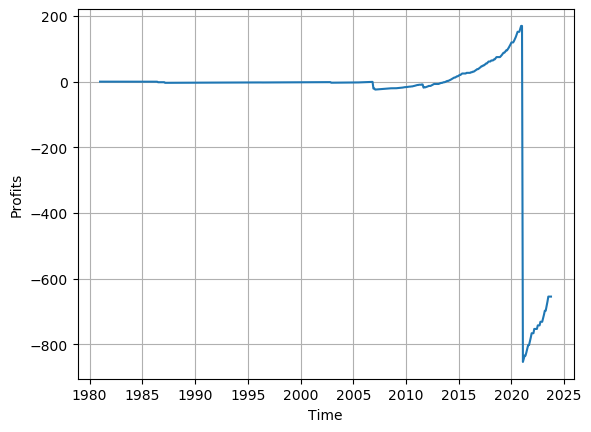

In [13]:
plt.plot(np.cumsum(df["Profits"]))
plt.grid()
plt.xlabel("Time")
plt.ylabel("Profits")
plt.show()

The drop is a result of covid - unexpected scenario. Asymmetric returns on the downside, huge loss.

# 5.5) Short write up about how you see your skills valuable to PJ (avalanche + the arena) and/or Philip Liu (bitman)

Philip Liu spoke about the company he works at, Bitmain, which develops digital mining servers. Philip specifically mentioned that there is a need for AI computing hardware, and DGX Cloud. Throughout my undergraduate studies, I took some machine learning and AI courses as a computer science minor, and the skills learnt through such education would be very valuable in developing AI computing hardware. Additionally, ECON425 here at the MQE program will provide me with further knowledge that can be applied to backend coding for such programs. Moreover, my ever-growing knowledge of finance and blockchains would also be valuable as they provide me with the "why?" of what Bitmain is working towards - manufacturing mining services for cryptocurrencies. Similarly, these skills would be valuable to PJ who worked at Avalanche which is a blockchain platform to process transactions, as this system not only requires an understanding of finance and the intuition behind such transactions, but also requires coding and AI skills that can be used to further develop the system.

# 6.) Create a loop that stores total profits over time

# 7.) What is the optimal threshold and plot the total profits for this model.